In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [18]:
#transfermarkt data cleaning
path = r'C:\\Users\\aaron\\prem_league_analytics\\data\\'
df_tm_transfer = pd.read_csv(path+'transfer.csv')

In [19]:
df_tm_transfer.head()

,name,age,height,position,foot,current club,09/10 date,09/10 left,09/10 joined,09/10 mv,...,00/01 date,00/01 left,00/01 joined,00/01 mv,00/01 fee,97/98 date,97/98 left,97/98 joined,97/98 mv,97/98 fee
0,Ederson,26,188.0,W,left,Manchester City,"Jan 1, 2010",São Paulo U17,Benfica U17,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Claudio Bravo,36,184.0,W,right,Manchester City,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Scott Carson,34,188.0,W,right,Manchester City,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Aymeric Laporte,25,191.0,W,left,Manchester City,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,John Stones,25,188.0,W,right,Manchester City,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df_trans16 = df_tm_transfer[['name','age', 'height', 'position', 'current club', '15/16 date', '15/16 left', '15/16 joined', '15/16 mv']]
df_trans17 = df_tm_transfer[['name','age', 'height', 'position', 'current club', '16/17 date', '16/17 left', '16/17 joined', '16/17 mv']]
df_trans18 = df_tm_transfer[['name','age', 'height', 'position', 'current club', '17/18 date', '17/18 left', '17/18 joined', '17/18 mv']]
df_trans19 = df_tm_transfer[['name','age', 'height', 'position', 'current club', '18/19 date', '18/19 left', '18/19 joined', '18/19 mv']]
df_trans20 = df_tm_transfer[['name','age', 'height', 'position', 'current club', '19/20 date', '19/20 left', '19/20 joined', '19/20 mv']]

In [21]:
path = r'C:\Users\aaron\prem_league_analytics\data\transfermarkt\transfer_data\ '

df_trans16.to_csv(path+'trans16.csv')
df_trans17.to_csv(path+'trans17.csv')
df_trans18.to_csv(path+'trans18.csv')
df_trans19.to_csv(path+'trans19.csv')
df_trans20.to_csv(path+'trans20.csv')

In [22]:
df_trans16 = pd.read_csv(path+'trans16.csv')
df_trans16['year'] = '15/16'
df_trans17 = pd.read_csv(path+'trans17.csv')
df_trans17['year'] = '16/17'
df_trans18 = pd.read_csv(path+'trans18.csv')
df_trans18['year'] = '17/18'
df_trans19 = pd.read_csv(path+'trans19.csv')
df_trans19['year'] = '18/19'
df_trans20 = pd.read_csv(path+'trans20.csv')
df_trans20['year'] = '19/20'

In [23]:
df_trans16.rename(columns={'15/16 date':'date','15/16 left': 'left', '15/16 joined' : 'joined', '15/16 mv': 'mv'} , inplace=True)
df_trans17.rename(columns={'16/17 date':'date','16/17 left': 'left', '16/17 joined' : 'joined', '16/17 mv': 'mv'} , inplace=True)
df_trans18.rename(columns={'17/18 date':'date','17/18 left': 'left', '17/18 joined' : 'joined', '17/18 mv': 'mv'} , inplace=True)
df_trans19.rename(columns={'18/19 date':'date','18/19 left': 'left', '18/19 joined' : 'joined', '18/19 mv': 'mv'} , inplace=True)
df_trans20.rename(columns={'19/20 date':'date','19/20 left': 'left', '19/20 joined' : 'joined', '19/20 mv': 'mv'} , inplace=True)

In [24]:
df_trans = pd.concat([df_trans16, df_trans17, df_trans18, df_trans19, df_trans20], sort=False)
df_trans

,Unnamed: 0,name,age,height,position,current club,date,left,joined,mv,year
0,0,Ederson,26,188.0,W,Manchester City,"Jul 1, 2015",Rio Ave FC,Benfica,"1,20 mil. €",15/16
1,1,Claudio Bravo,36,184.0,W,Manchester City,NaN,NaN,NaN,NaN,15/16
2,2,Scott Carson,34,188.0,W,Manchester City,"Jul 1, 2015",Wigan,Derby,"2,00 mil. €",15/16
3,3,Aymeric Laporte,25,191.0,W,Manchester City,NaN,NaN,NaN,NaN,15/16
4,4,John Stones,25,188.0,W,Manchester City,NaN,NaN,NaN,NaN,15/16
5,5,Nicolás Otamendi,31,183.0,W,Manchester City,"Aug 20, 2015",Valencia,Man City,"25,00 mil. €",15/16
6,6,Benjamin Mendy,25,185.0,W,Manchester City,NaN,NaN,NaN,NaN,15/16
7,7,Oleksandr Zinchenko,22,175.0,W,Manchester City,NaN,NaN,NaN,NaN,15/16
8,8,Angeliño,22,175.0,W,Manchester City,"Oct 31, 2015Jul 8, 2015",NYCFCMan City U21,Man City U21NYCFC,NaN,15/16
9,9,João Cancelo,25,182.0,W,Manchester City,"Jul 1, 2015",Benfica,Valencia,"5,00 mil. €",15/16


In [25]:
df_trans['firstinitial'] = df_trans['name'].astype(str).str[0]
df_trans['lastname'] = df_trans['name'].str.split(' ').str[1]
df_trans['short_name']=df_trans['firstinitial'].astype(str)+'. '+df_trans['lastname']
df_trans

,Unnamed: 0,name,age,height,position,current club,date,left,joined,mv,year,firstinitial,lastname,short_name
0,0,Ederson,26,188.0,W,Manchester City,"Jul 1, 2015",Rio Ave FC,Benfica,"1,20 mil. €",15/16,E,NaN,NaN
1,1,Claudio Bravo,36,184.0,W,Manchester City,NaN,NaN,NaN,NaN,15/16,C,Bravo,C. Bravo
2,2,Scott Carson,34,188.0,W,Manchester City,"Jul 1, 2015",Wigan,Derby,"2,00 mil. €",15/16,S,Carson,S. Carson
3,3,Aymeric Laporte,25,191.0,W,Manchester City,NaN,NaN,NaN,NaN,15/16,A,Laporte,A. Laporte
4,4,John Stones,25,188.0,W,Manchester City,NaN,NaN,NaN,NaN,15/16,J,Stones,J. Stones
5,5,Nicolás Otamendi,31,183.0,W,Manchester City,"Aug 20, 2015",Valencia,Man City,"25,00 mil. €",15/16,N,Otamendi,N. Otamendi
6,6,Benjamin Mendy,25,185.0,W,Manchester City,NaN,NaN,NaN,NaN,15/16,B,Mendy,B. Mendy
7,7,Oleksandr Zinchenko,22,175.0,W,Manchester City,NaN,NaN,NaN,NaN,15/16,O,Zinchenko,O. Zinchenko
8,8,Angeliño,22,175.0,W,Manchester City,"Oct 31, 2015Jul 8, 2015",NYCFCMan City U21,Man City U21NYCFC,NaN,15/16,A,NaN,NaN
9,9,João Cancelo,25,182.0,W,Manchester City,"Jul 1, 2015",Benfica,Valencia,"5,00 mil. €",15/16,J,Cancelo,J. Cancelo


In [26]:
df_trans = df_trans.drop(columns=['Unnamed: 0','firstinitial', 'lastname'])
df_trans = df_trans.dropna()
df_trans

,name,age,height,position,current club,date,left,joined,mv,year,short_name
2,Scott Carson,34,188.0,W,Manchester City,"Jul 1, 2015",Wigan,Derby,"2,00 mil. €",15/16,S. Carson
5,Nicolás Otamendi,31,183.0,W,Manchester City,"Aug 20, 2015",Valencia,Man City,"25,00 mil. €",15/16,N. Otamendi
9,João Cancelo,25,182.0,W,Manchester City,"Jul 1, 2015",Benfica,Valencia,"5,00 mil. €",15/16,J. Cancelo
15,Kevin De Bruyne,28,181.0,W,Manchester City,"Aug 30, 2015",VfL Wolfsburg,Man City,"45,00 mil. €",15/16,K. De
17,Raheem Sterling,24,170.0,W,Manchester City,"Jul 14, 2015",Liverpool,Man City,"40,00 mil. €",15/16,R. Sterling
18,Leroy Sané,23,184.0,W,Manchester City,"Jul 1, 2015",Schalke 04 U19,FC Schalke 04,"4,00 mil. €",15/16,L. Sané
25,Andy Lonergan,35,193.0,W,Liverpool FC,"Jul 1, 2015",Bolton,Fulham,500 thousand €,15/16,A. Lonergan
26,Virgil van Dijk,28,193.0,W,Liverpool FC,"Sep 1, 2015",Celtic,Southampton,"5,00 mil. €",15/16,V. van
27,Joe Gomez,22,188.0,W,Liverpool FC,"Jul 1, 2015",Charlton,Liverpool,"2,50 mil. €",15/16,J. Gomez
32,Nathaniel Clyne,28,175.0,W,Liverpool FC,"Jul 1, 2015",Southampton,Liverpool,"17,00 mil. €",15/16,N. Clyne


In [27]:
df_trans['mv'].replace(',00','',regex=True,inplace=True)
df_trans['mv'].replace(',25','',regex=True,inplace=True)
df_trans['mv'].replace(',50','',regex=True,inplace=True)
df_trans['mv'].replace(' mil. €','000000',regex=True,inplace=True)
df_trans['mv'].replace(' thousand €','000',regex=True,inplace=True)
df_trans

,name,age,height,position,current club,date,left,joined,mv,year,short_name
2,Scott Carson,34,188.0,W,Manchester City,"Jul 1, 2015",Wigan,Derby,2000000,15/16,S. Carson
5,Nicolás Otamendi,31,183.0,W,Manchester City,"Aug 20, 2015",Valencia,Man City,25000000,15/16,N. Otamendi
9,João Cancelo,25,182.0,W,Manchester City,"Jul 1, 2015",Benfica,Valencia,5000000,15/16,J. Cancelo
15,Kevin De Bruyne,28,181.0,W,Manchester City,"Aug 30, 2015",VfL Wolfsburg,Man City,45000000,15/16,K. De
17,Raheem Sterling,24,170.0,W,Manchester City,"Jul 14, 2015",Liverpool,Man City,40000000,15/16,R. Sterling
18,Leroy Sané,23,184.0,W,Manchester City,"Jul 1, 2015",Schalke 04 U19,FC Schalke 04,4000000,15/16,L. Sané
25,Andy Lonergan,35,193.0,W,Liverpool FC,"Jul 1, 2015",Bolton,Fulham,500000,15/16,A. Lonergan
26,Virgil van Dijk,28,193.0,W,Liverpool FC,"Sep 1, 2015",Celtic,Southampton,5000000,15/16,V. van
27,Joe Gomez,22,188.0,W,Liverpool FC,"Jul 1, 2015",Charlton,Liverpool,2000000,15/16,J. Gomez
32,Nathaniel Clyne,28,175.0,W,Liverpool FC,"Jul 1, 2015",Southampton,Liverpool,17000000,15/16,N. Clyne


In [28]:
df_trans = df_trans[df_trans['mv'].map(len) < 10]
df_trans = df_trans[df_trans['mv'].map(len) > 1]
df_trans

,name,age,height,position,current club,date,left,joined,mv,year,short_name
2,Scott Carson,34,188.0,W,Manchester City,"Jul 1, 2015",Wigan,Derby,2000000,15/16,S. Carson
5,Nicolás Otamendi,31,183.0,W,Manchester City,"Aug 20, 2015",Valencia,Man City,25000000,15/16,N. Otamendi
9,João Cancelo,25,182.0,W,Manchester City,"Jul 1, 2015",Benfica,Valencia,5000000,15/16,J. Cancelo
15,Kevin De Bruyne,28,181.0,W,Manchester City,"Aug 30, 2015",VfL Wolfsburg,Man City,45000000,15/16,K. De
17,Raheem Sterling,24,170.0,W,Manchester City,"Jul 14, 2015",Liverpool,Man City,40000000,15/16,R. Sterling
18,Leroy Sané,23,184.0,W,Manchester City,"Jul 1, 2015",Schalke 04 U19,FC Schalke 04,4000000,15/16,L. Sané
25,Andy Lonergan,35,193.0,W,Liverpool FC,"Jul 1, 2015",Bolton,Fulham,500000,15/16,A. Lonergan
26,Virgil van Dijk,28,193.0,W,Liverpool FC,"Sep 1, 2015",Celtic,Southampton,5000000,15/16,V. van
27,Joe Gomez,22,188.0,W,Liverpool FC,"Jul 1, 2015",Charlton,Liverpool,2000000,15/16,J. Gomez
32,Nathaniel Clyne,28,175.0,W,Liverpool FC,"Jul 1, 2015",Southampton,Liverpool,17000000,15/16,N. Clyne


In [29]:
df_trans['mv'] = pd.to_numeric(df_trans['mv'])
df_trans

,name,age,height,position,current club,date,left,joined,mv,year,short_name
2,Scott Carson,34,188.0,W,Manchester City,"Jul 1, 2015",Wigan,Derby,2000000,15/16,S. Carson
5,Nicolás Otamendi,31,183.0,W,Manchester City,"Aug 20, 2015",Valencia,Man City,25000000,15/16,N. Otamendi
9,João Cancelo,25,182.0,W,Manchester City,"Jul 1, 2015",Benfica,Valencia,5000000,15/16,J. Cancelo
15,Kevin De Bruyne,28,181.0,W,Manchester City,"Aug 30, 2015",VfL Wolfsburg,Man City,45000000,15/16,K. De
17,Raheem Sterling,24,170.0,W,Manchester City,"Jul 14, 2015",Liverpool,Man City,40000000,15/16,R. Sterling
18,Leroy Sané,23,184.0,W,Manchester City,"Jul 1, 2015",Schalke 04 U19,FC Schalke 04,4000000,15/16,L. Sané
25,Andy Lonergan,35,193.0,W,Liverpool FC,"Jul 1, 2015",Bolton,Fulham,500000,15/16,A. Lonergan
26,Virgil van Dijk,28,193.0,W,Liverpool FC,"Sep 1, 2015",Celtic,Southampton,5000000,15/16,V. van
27,Joe Gomez,22,188.0,W,Liverpool FC,"Jul 1, 2015",Charlton,Liverpool,2000000,15/16,J. Gomez
32,Nathaniel Clyne,28,175.0,W,Liverpool FC,"Jul 1, 2015",Southampton,Liverpool,17000000,15/16,N. Clyne


In [32]:
path = r'C:\Users\aaron\prem_league_analytics\data\ml_analysis\ '
df_trans.to_csv(path+'trans.csv')

In [30]:
order_mv = df_trans.groupby(by=['current club'])['mv'].median().sort_values(ascending=False).index

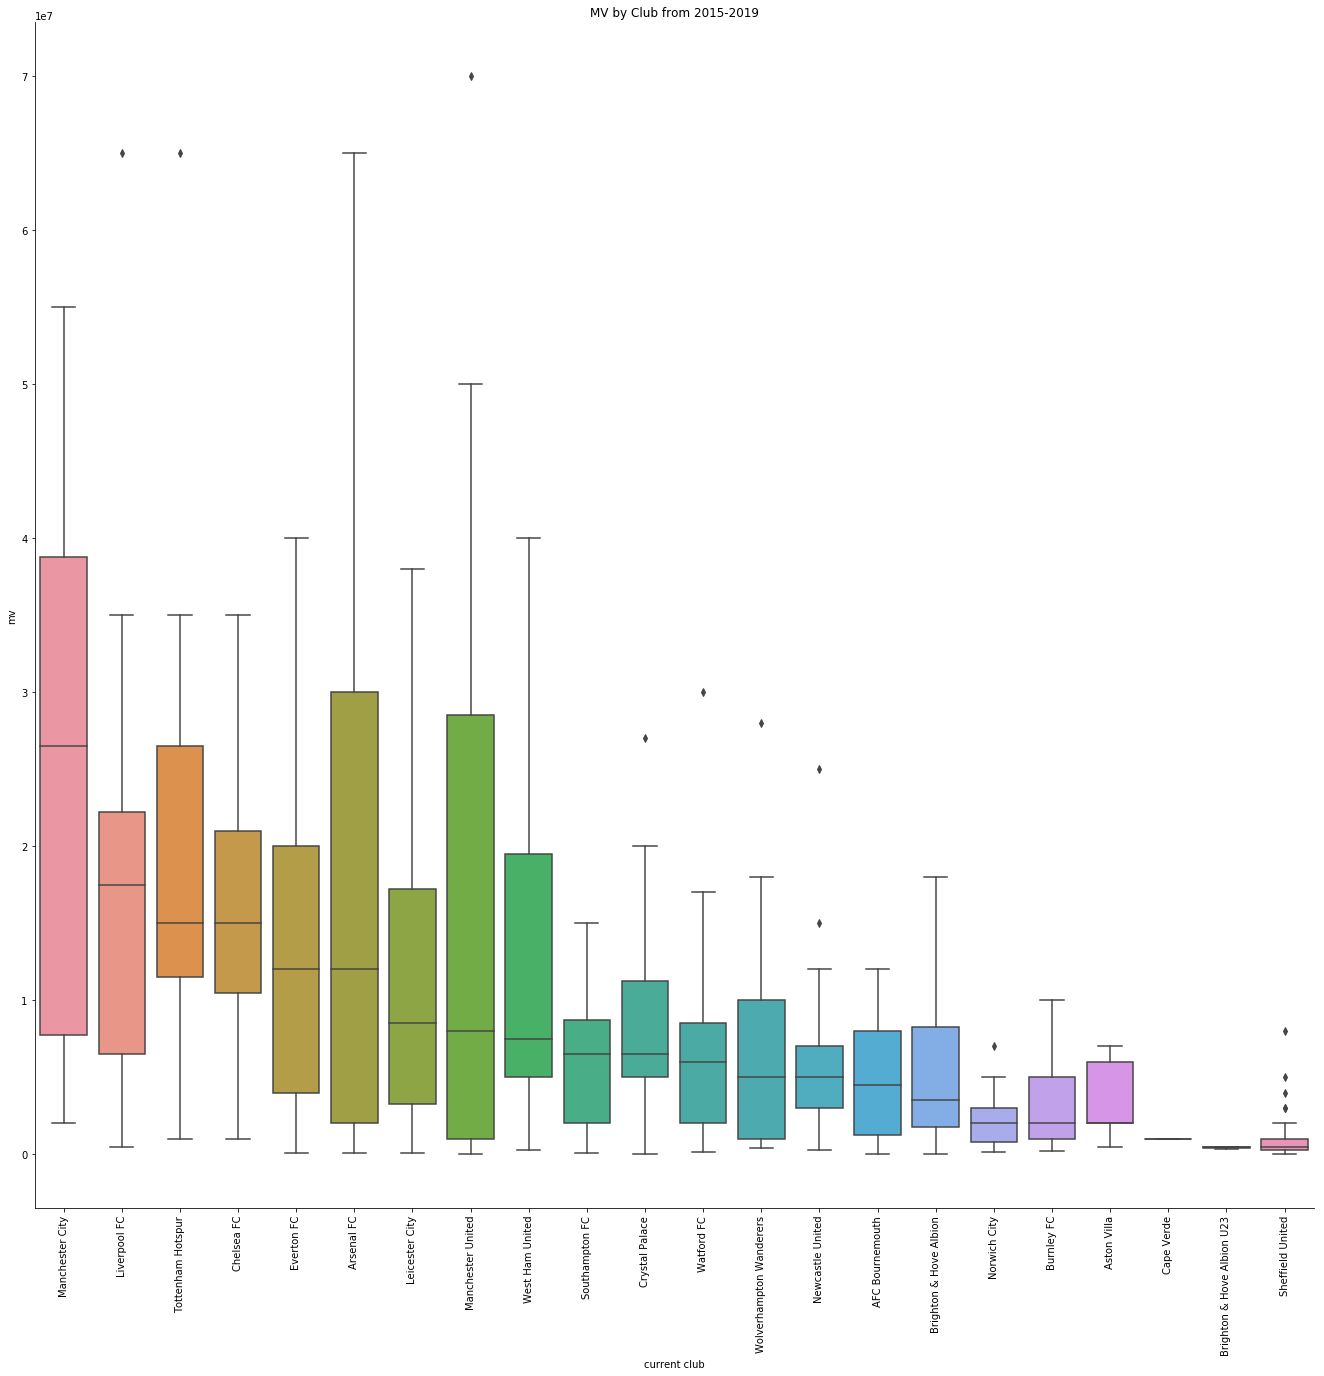

In [31]:
#Historical trends from 
ax=sns.catplot(x="current club", y="mv", kind="box", order=order_mv, data=df_trans)
ax.fig.set_size_inches(25,20)
ax.set_xticklabels(rotation=90)
plt.title('MV by Club from 2015-2019')
plt.show()